<a href="https://colab.research.google.com/github/Nsujatno/the-great-winter-lock-in/blob/main/Day_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is following part 2 of learn pytorch for deep learning in a day.

- This section covers the pytorch workflow

# Pytorch workflow
This is only one of many

1. Get data ready by turning it into tensors
2. Build or pick a pretrained model
  - 2.1 Pick a loss function and optimizer
  - 2.2 Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate te model
5. Improve through experimentation
6. Save and reload your trained model

In [17]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.9.0+cu126'

# Data (preparing and loading)

Data can be almost anything
- Excel spreadsheet
- Images
- Videos
- Audio
- Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data with linear regression

We'll use a linear regression formula to make a straight line with *known* parameters.

Parameter: something the model learns

In [18]:
# Create known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [19]:
len(X), len(y)

(50, 50)

# Split data into training and test sets

Training set: The model learns from this data (like the course materials you study during the semester). 60-80%

Validation set: The model gets tuned on this data (like the practice exam you take before the final exam). 10-20%. not used always

Testing set: The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). 10-20%

**Generalization**: the ability for a machine learning model to perform well on data it hasn't seen before

In [20]:
# create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to visualize data better

In [21]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

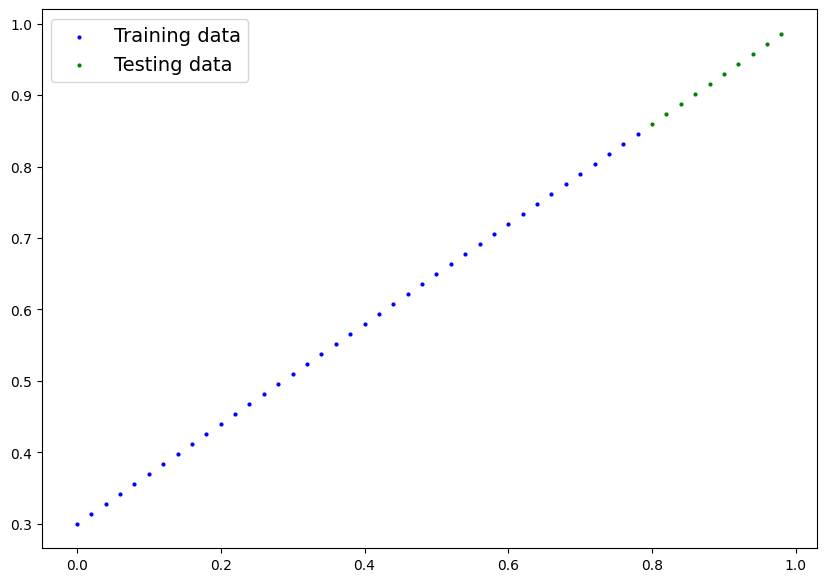

In [22]:
plot_predictions();

# Build model

What our model does:
- start with random values (weight and bias)
- look at training data and adjust the random values to better represent the ideal values

How does it do so?
1. Gradient descent
2. Backpropagation

`torch.nn`: contains all the building blocks for computational graphs

`torch.nn.Parameter`: stores tensors that can be used with `nn.Module`. gradients are used for updating model parameters via gradient descent. these are caclulated randomly

`torch.nn.Module`: base class for all neural network modules. requires a `forward()` method to be implemented

**Gradient descent**: going down a mountain step by step. you want to go at the steepest part to go down as quickly as possible.
- **Cost function**: basically its how far off your model is. its ususally squaring the error to prevent negatives and punish bigger mistakes. basically when we talk about a network learning it's just minimizing the cost function
- **Learning rate**: the size of the steps you take in the example. too large and you might overshoot. too small and it'll take forever

Videos watched for extra resources:
- https://youtu.be/IHZwWFHWa-w?si=L2QtElxd-tvKCwn7




In [23]:
from torch import nn

# create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    # we start with random weights that get adjusted as the model learns
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # we start with random bias that get adjusted as the model learns
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression model

# Check contents of a pytorch model

In [24]:
torch.manual_seed(42)

# create instance of the model
model_0 = LinearRegressionModel()

# check nn.parameters within the nn.module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
# we can also get what the model contains using state_dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

We basically start with random float tensors and update them to fit our data best

# Making predictions


In [26]:
# make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# inference mode turns off a bunch of things to make forward passes faster

In [27]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


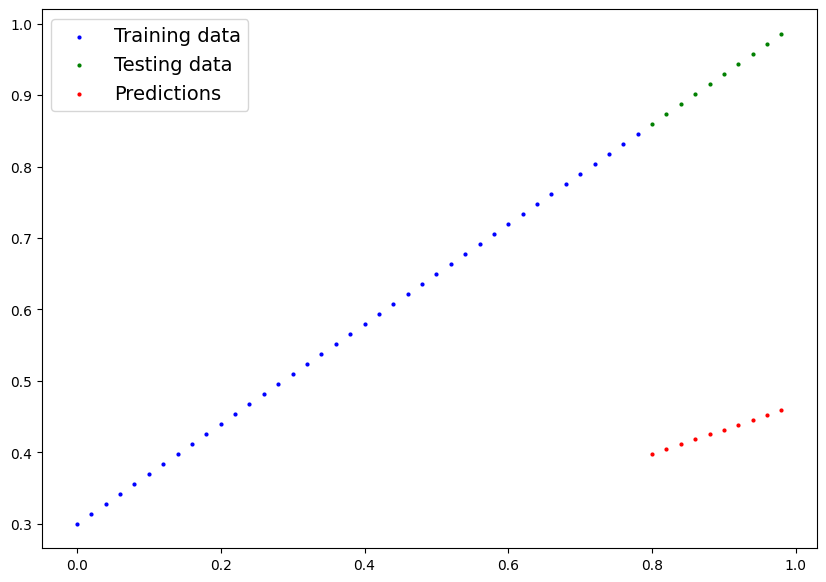

In [28]:
plot_predictions(predictions=y_preds)

In [29]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# Train model

we need to update the internal parameters so the model can figure them out

for this we need a *loss function* and *optimizer*

optimizer:
- tells model how to update internal parameters to lower the loss
- common val is stochastic gradient descent

we need training loop and testing loop


In [30]:
list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [32]:
# create the loss function
loss_fn = nn.L1Loss() # mean absolute error

# create optimizer
# params is the target model parameter you want to optimize
# lr is the learning rate
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

Training loop: model goes through the training data dn learns the relationships between the features and labels
1. Forward pass
2. calculate loss
3. zero gradient
4. perform backpropagation on the loss
5. update optimizer

Testing loop: the model goes thorugh the testing data nd sees how god the model is
1. Forward pass
2. calculate loss
3. calculate eval metrics (optional)

in testing we are only interested in the output of the forward pass. there is no changing of the parameters in the model

In [33]:
torch.manual_seed(42)

# set number of epochs (how many times the model will pass over the training data)
epochs = 200

# create empty loss list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### training
  model_0.train()

  # forward pass
  y_pred = model_0(X_train)

  # calculate loss
  loss = loss_fn(y_pred, y_train)

  # zero grad of the optimizer
  optimizer.zero_grad()

  # loss backwards
  loss.backward()

  # progress optimizer
  optimizer.step()

  ### testing
  model_0.eval()

  with torch.inference_mode():
    # forward pass on test data
    test_pred = model_0(X_test)

    # calculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # print out waht's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")


Epoch: 0 | MAE train loss: 0.31288138031959534 | MAE test loss: 0.48106518387794495
Epoch: 10 | MAE train loss: 0.1976713240146637 | MAE test loss: 0.3463551998138428
Epoch: 20 | MAE train loss: 0.08908725529909134 | MAE test loss: 0.21729660034179688
Epoch: 30 | MAE train loss: 0.053148526698350906 | MAE test loss: 0.14464017748832703
Epoch: 40 | MAE train loss: 0.04543796554207802 | MAE test loss: 0.11360953003168106
Epoch: 50 | MAE train loss: 0.04167863354086876 | MAE test loss: 0.09919948130846024
Epoch: 60 | MAE train loss: 0.03818932920694351 | MAE test loss: 0.08886633068323135
Epoch: 70 | MAE train loss: 0.03476089984178543 | MAE test loss: 0.0805937647819519
Epoch: 80 | MAE train loss: 0.03132382780313492 | MAE test loss: 0.07232122868299484
Epoch: 90 | MAE train loss: 0.02788739837706089 | MAE test loss: 0.06473556160926819
Epoch: 100 | MAE train loss: 0.024458957836031914 | MAE test loss: 0.05646304413676262
Epoch: 110 | MAE train loss: 0.021020207554101944 | MAE test loss:

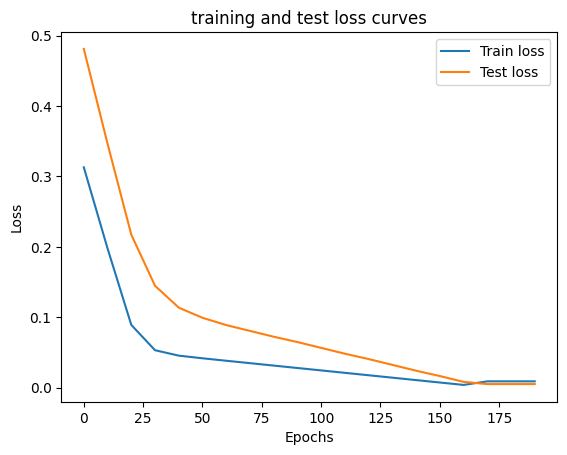

In [34]:
# plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [35]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [36]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

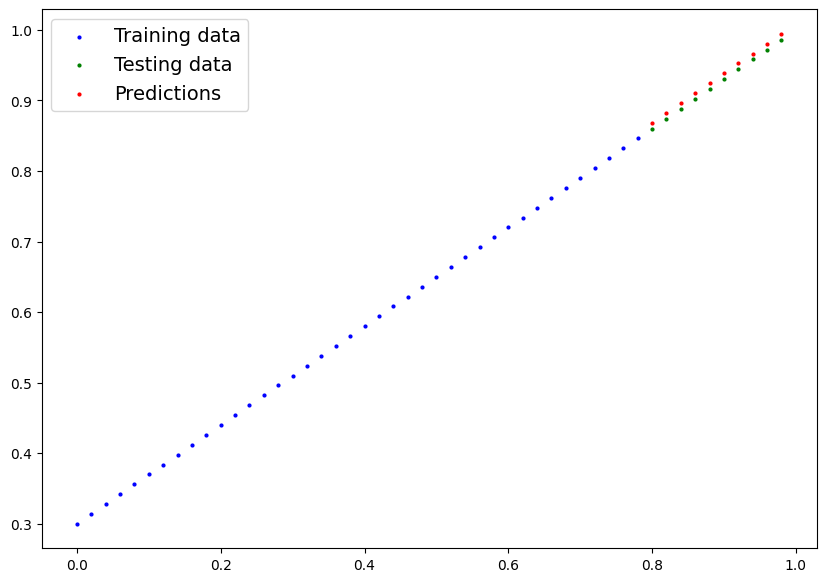

In [37]:
plot_predictions(predictions=y_preds)

# Saving and loading a pytorch model

3 methods for saving and loading models
1. torch.save: saves model in pickle format
2. torch.load: loads the pickled python object file
3. torch.nn.Module.load_state_dict: loads a models parameter dictionary

In [38]:
# saving our pytorch model
from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [39]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2117 Dec 20 19:58 01_pytorch_workflow_model_0.pth


In [40]:
# load model
loaded_model_0 = LinearRegressionModel()

# load the saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [41]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [42]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together



In [43]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

In [44]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [45]:
# create data
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
# split data into train and test split. using 80/20
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

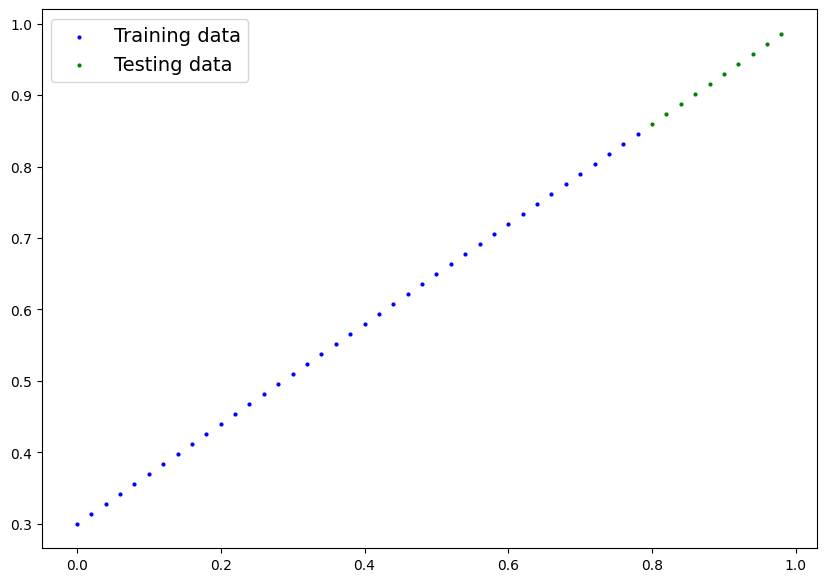

In [47]:
# visualize data
plot_predictions(X_train, y_train, X_test, y_test)

In [48]:
# this time we create model with nn.Linear instead of doing it manually
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # define forward
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


# set manual seed when creating model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [50]:
# change to gpu if available
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [51]:
# create loss function and optimizer

# loss function
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [52]:
# training and testing loop
torch.manual_seed(42)

epochs = 1000

# put data on gpu
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ## training
  model_1.train()

  # forward pass
  y_pred = model_1.forward(X_train)

  # calulate loss
  loss = loss_fn(y_pred, y_train)

  # zero gradients
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # step optimizer
  optimizer.step()

  ## testing
  model_1.eval()

  # forward
  with torch.inference_mode():
    test_pred = model_1(X_test)

    # calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [53]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [54]:
# make predictions on model
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

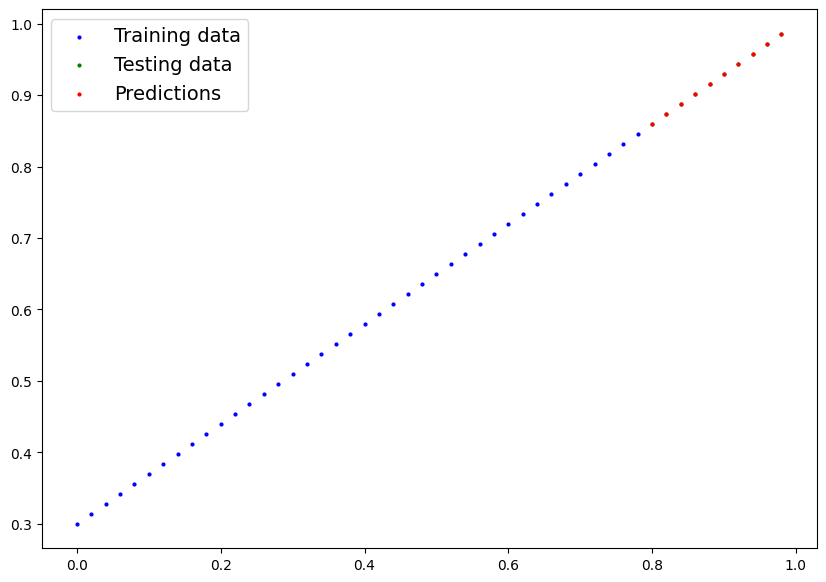

In [55]:
# plot predictions
plot_predictions(predictions=y_preds.cpu())